In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

In [33]:
data = pd.read_csv("parkingLot (1).csv")
data['timestamp'] = pd.to_datetime(data['timestamp']) - pd.Timedelta(seconds=1)  # Adjust for the 12 o'clock problem
data['date'] = data['timestamp'].dt.date

spent = []
data_grouped = data.groupby(['vehicle_no', 'date'])
for (vehicle_no, date), vehicle_data in data_grouped:
    vehicle_data = vehicle_data.sort_values(by='timestamp')  
    if len(vehicle_data) % 2 == 0:  
        for i in range(0, len(vehicle_data) - 1, 2):  
            diff = vehicle_data["timestamp"].iloc[i + 1] - vehicle_data['timestamp'].iloc[i]
            spent.append({'date': date, 'time': (diff.total_seconds() / 60)})  

time_spent = pd.DataFrame(spent)
avg_time_spent= time_spent.groupby('date').mean().reset_index()

test_size = 7
size = len(avg_time_spent) - test_size
train = avg_time_spent['time'].iloc[:size]
test = avg_time_spent['time'].iloc[size:]
print(train.dtypes)

float64


In [34]:
p_value = adfuller(train)[1]
print(p_value)

0.6731196248236193


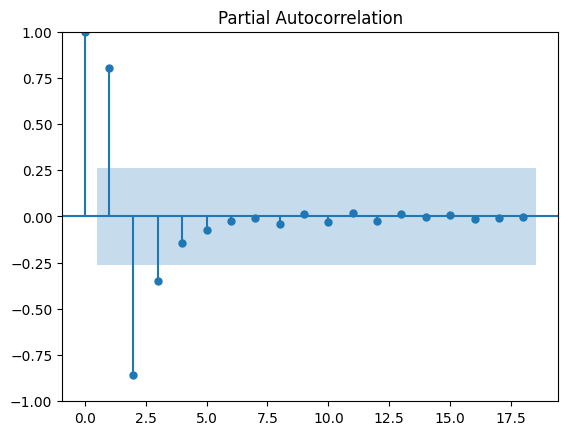

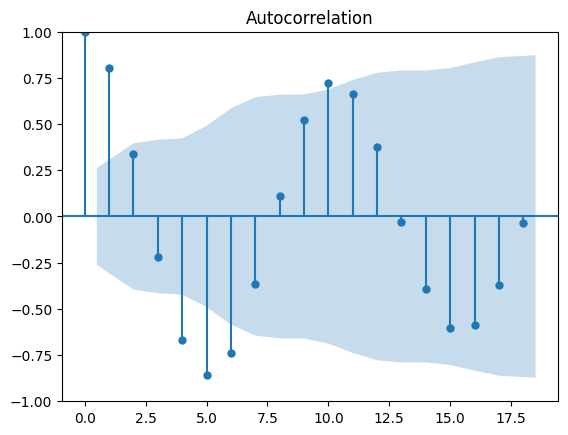

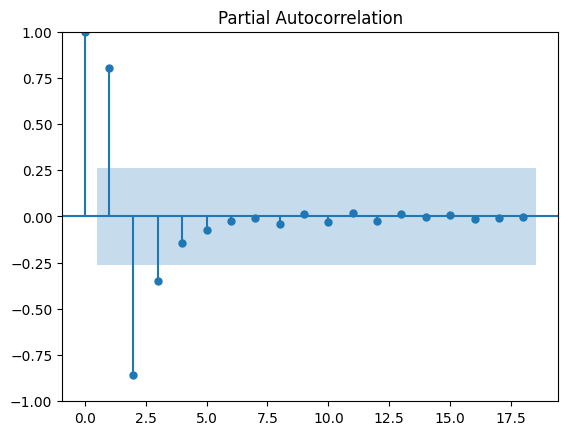

In [35]:
smt.graphics.plot_acf(df_train)
smt.graphics.plot_pacf(df_train)

In [36]:
model_b = ARIMA(train, order=(3, 1, 1))#reason for 3 is above
model_fit_b = model_b.fit()
print(model_fit_b.summary())

                               SARIMAX Results                                
Dep. Variable:                   time   No. Observations:                   56
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -169.361
Date:                Sun, 19 Jan 2025   AIC                            348.721
Time:                        23:56:26   BIC                            358.758
Sample:                             0   HQIC                           352.603
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0621      0.167      6.358      0.000       0.735       1.389
ar.L2         -0.0486      0.281     -0.173      0.862      -0.599       0.501
ar.L3         -0.5772      0.169     -3.405      0.0

In [37]:
forecast=model_fit_b.forecast(steps=7)
mase_b = mean_absolute_error(test.head(len(forecast)), forecast) / test.mean()
mape_b = mean_absolute_percentage_error(test.head(len(forecast)), forecast)
print(f'Part B - Average Time Spent: MASE: {mase_b}, MAPE: {mape_b}')

Part B - Average Time Spent: MASE: 0.031095554926266065, MAPE: 0.03279100746806475


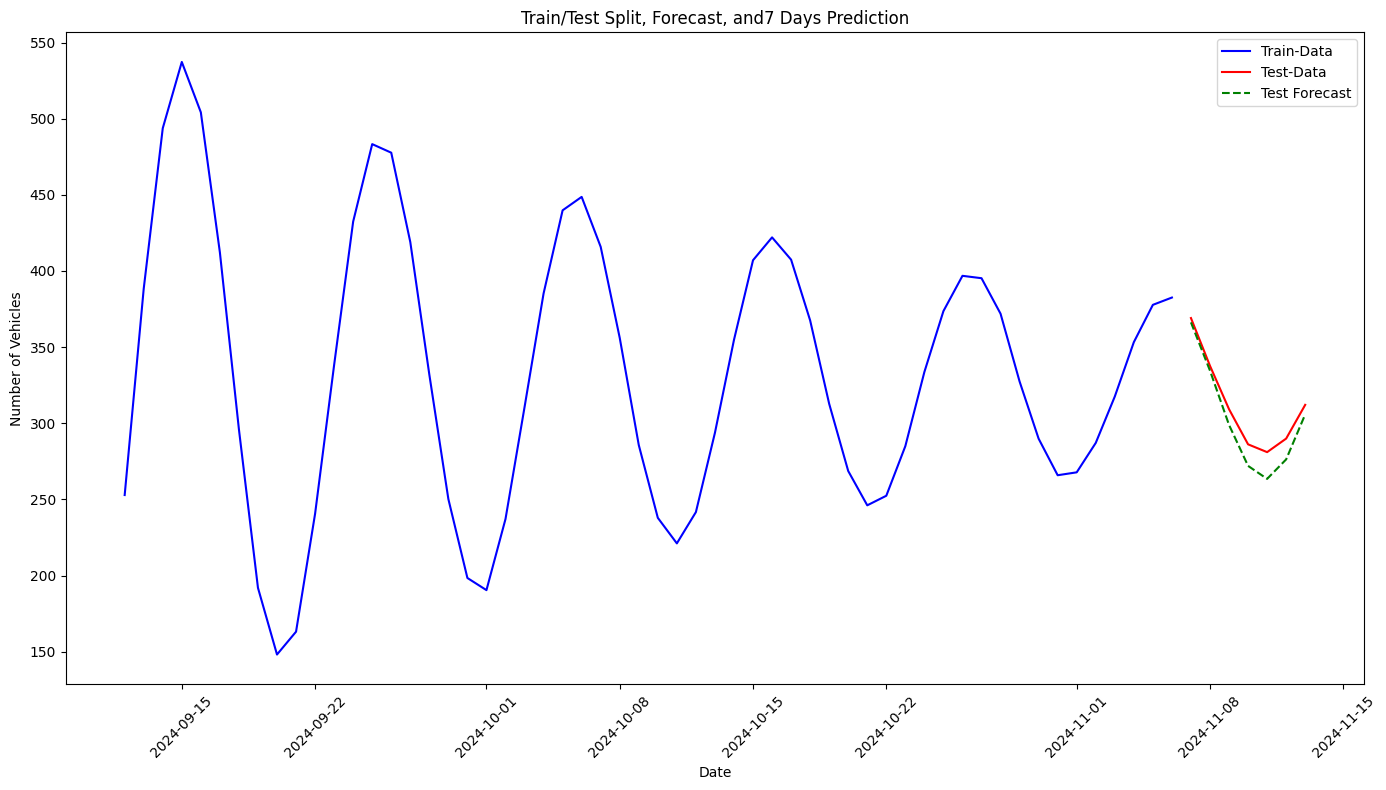

In [38]:
plt.figure(figsize=(14, 8))
plt.plot(avg_time_spent['date'].iloc[:size], train, label='Train-Data', color='blue')
plt.plot(avg_time_spent['date'].iloc[size:], test, label='Test-Data', color='red')
plt.plot(avg_time_spent['date'].iloc[size:], forecast, label='Test Forecast', color='green', linestyle='--')
#plt.plot(forecast_data['dates'], forecast_data['Pred entries'], label='7-Day Forecast', color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Train/Test Split, Forecast, and7 Days Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()